# Choisir le bon modèle

https://www.youtube.com/watch?v=4mqKmTbAnHY    
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

1. Choisir uniquement les modèles connus, que l'on comprend
1. Implémenter les modèles de données les plus simples
   * Régression => LinearRegression, Lasso, Rige
   * Classification => LogisticRegression, LinearsSVC, KNeighborsClassifier



In [1]:
from IPython.display import Image
from os import getcwd
file_path = getcwd() + "\\"
img_path = file_path + "img\\"
file_path

'c:\\Users\\User\\WORK\\wokspace-simplon3\\simplon\\cours\\'

# Modèle Supervisé

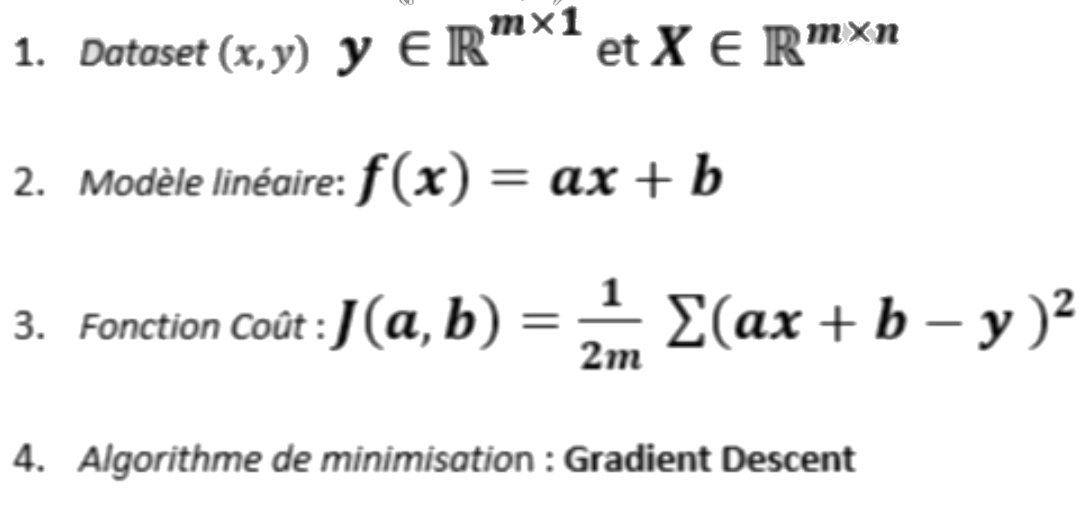

In [2]:
Image(filename = img_path + "choix-model-006.png")

Permet d'éliminer 80 % des bugs

## Descente de Gradiant

Algorithme d'optmisation de convergence vers le minimum d'une fonction convexe (en forme de U)    
Permet de minimiser la fonction coût

Minimum de la fonction coùut = trouver le meilleur modèle pour notre ML

La descente de gradiant est donc au coeur du ML

1. Calcul de la pente = en mathématique on calcul la dérivée
1. Avancer d'1 pas = Alpha = Learning Rate, vitesse de convergence de l'algorithme, on dit que c'est un hyperparamètre
1. on recommence

Suivant le sens le pente, la dérivée est négative ou positive, mais l'hyperparamètre Alpha est toujours positif.

### Learning Rate

Alpha est très importante, 
* ne doit pas être trop grande au risque de passer à côté du minimum.
* pas trop petit car ça peut prendre un temps infinit

Il faut tatonner pour trouver la bonne valeur

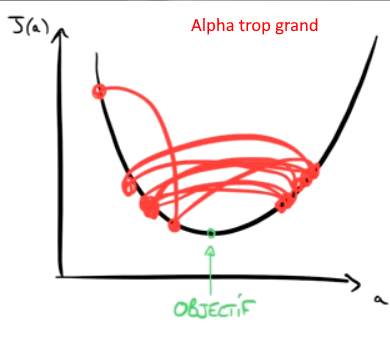

In [9]:
Image(filename = img_path + "choix-model-007.png")

### Gradiant

Calculer la dérivée

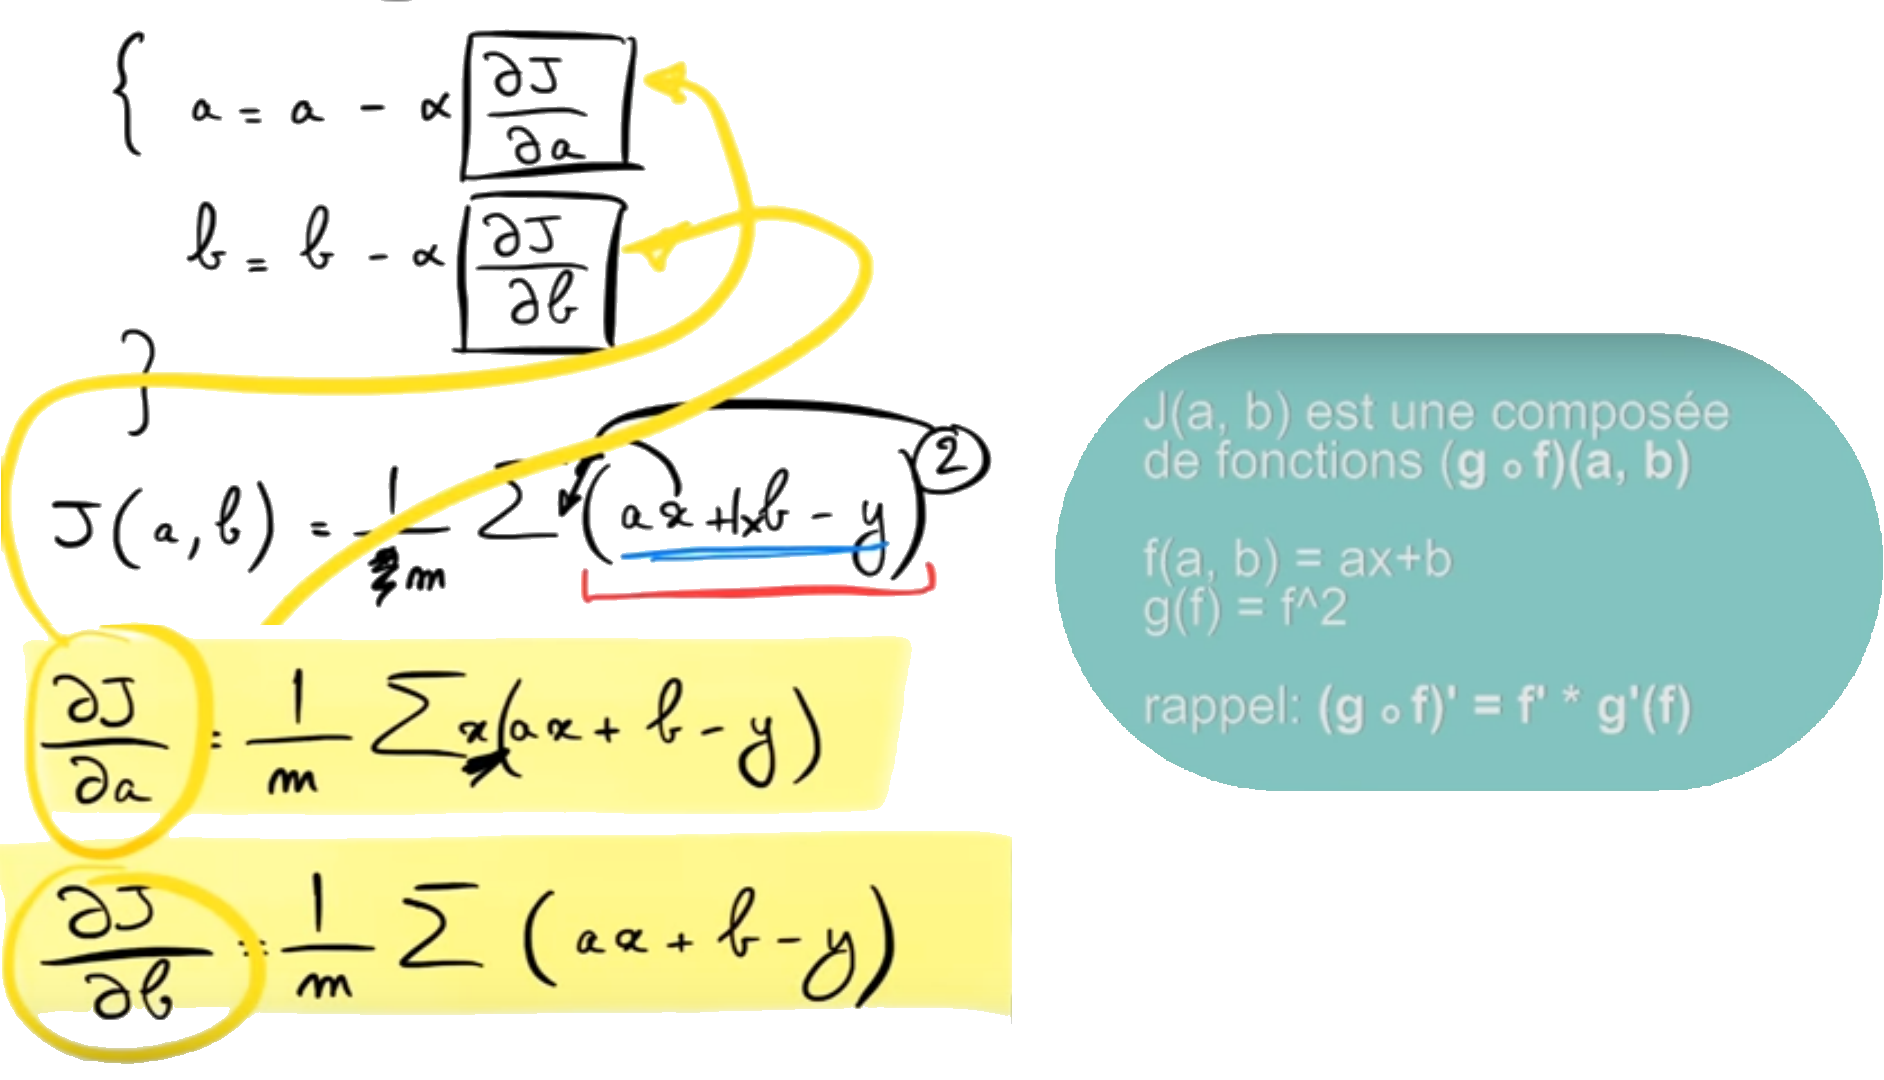

In [13]:
Image(filename = img_path + "choix-model-008.png")

Premier modèle de machine learning

### Resume

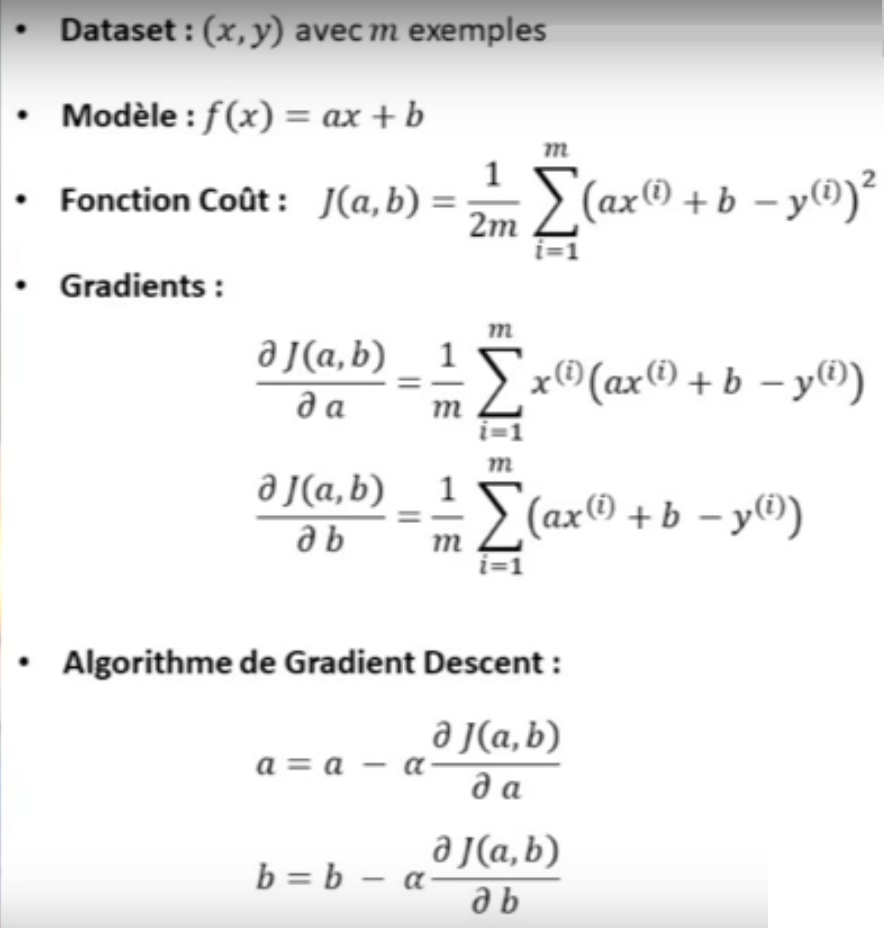

In [14]:
Image(filename = img_path + "choix-model-009.png")

# Choix Général

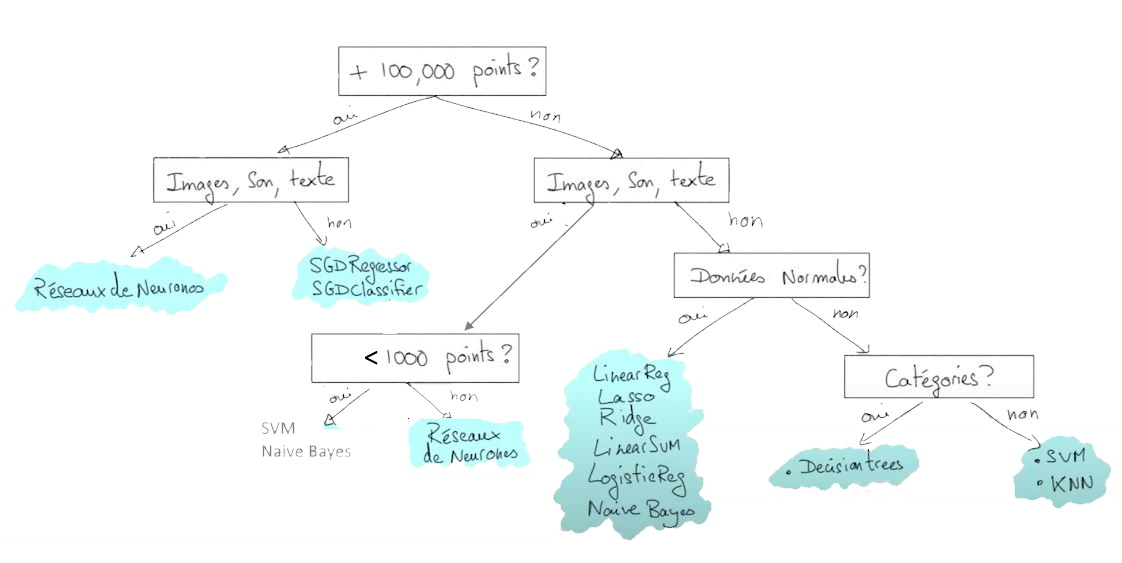

In [3]:
Image(filename = img_path + "ArbreDecisionModel.JPG")

### Critère 1 : Quantité de données

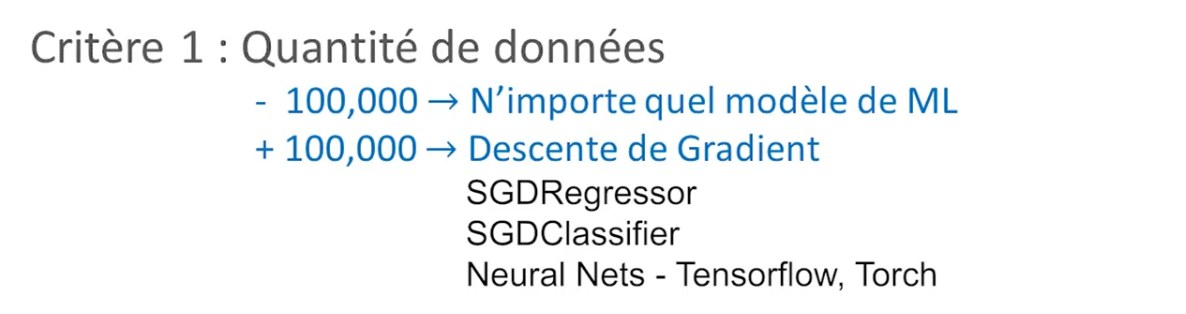

In [4]:
Image(filename = img_path + "choix-model-001.png")

### Critère 2 : Données struturées / Non Structurées

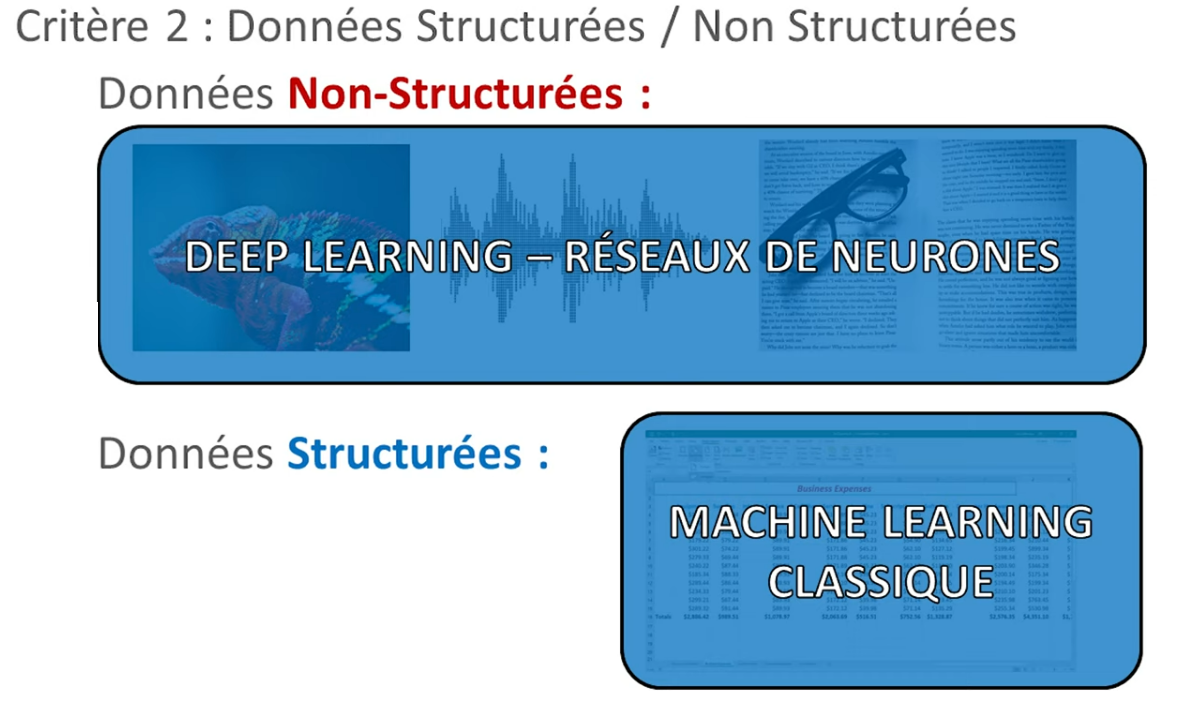

In [5]:
Image(filename = img_path + "choix-model-002.png")

### Critère 3 : Normalisté des données

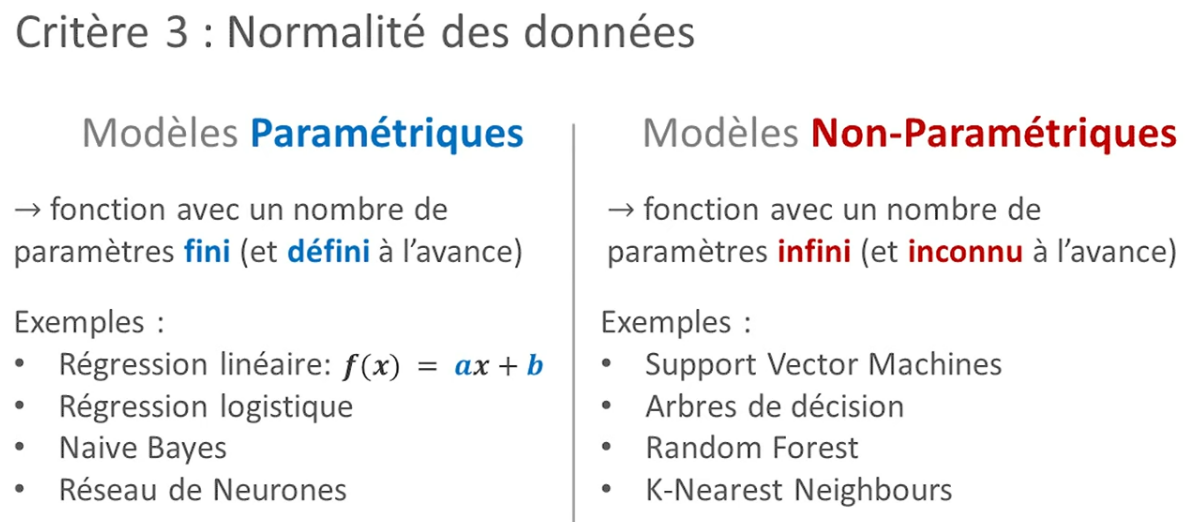

In [6]:
Image(filename = img_path + "choix-model-003.png")

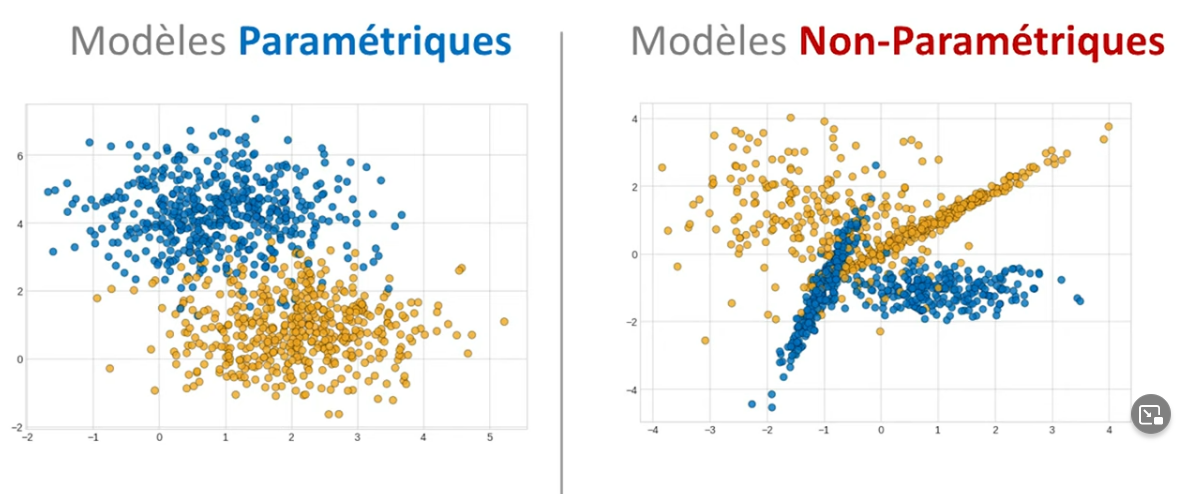

In [7]:
Image(filename = img_path + "choix-model-004.png")

### Critère 4 : Variables Quantitatives / Qualitatives

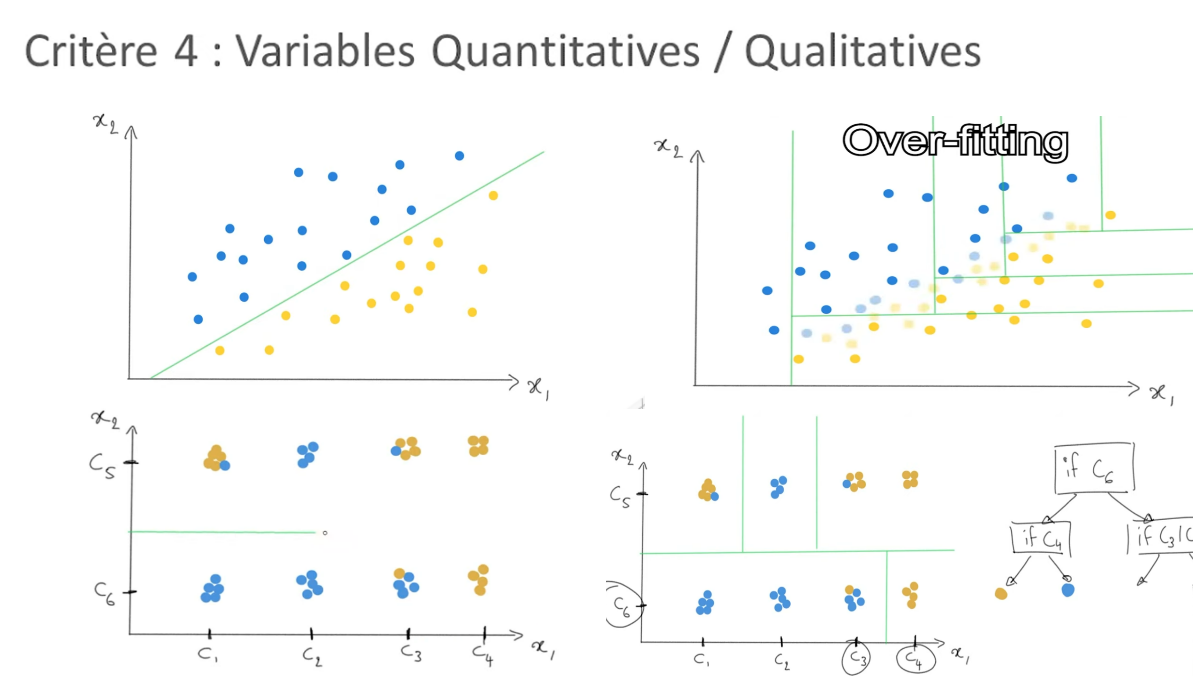

In [8]:
Image(filename = img_path + "choix-model-005.png")

Critère 1 :


# Estimer les erreurs
## Statistiques des erreurs

Utiliser toutes les statistiques des erreurs sur un modèle pour bien comprendre son modèle et les risques qui en découle

MAE, MSE, RMSE, Médiane, ....
* MSE = Mean Squared Error : vous accordez une grande importance aux grandes erreurs
* MAE = Mean Absolute Error : l'importance d'une erreur est linéaire avec son amplitude. Si le dataset contient des outliers
* Median Absolute Error : très peu sensible aux outliers
* Quintile
* R2 = Coefficient de Détermination

Voir la distribution que représente ces erreurs (Tracer l'histogramme de ses erreurs) pour déterminer des intervalles de confiance.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [21]:
y = np.array([1,2])
y_pred = np.array([5,2])

print("MAE :", mean_absolute_error(y, y_pred))
print("MSE :", np.sqrt(mean_squared_error(y, y_pred)))

y = np.array([1, 2, 2, 3, 5, 2])
y_pred = np.array([5,2, 2, 5, 7, 1000])
print("-----------------------------")
print("MAE :", mean_absolute_error(y, y_pred))
print("MSE :", np.sqrt(mean_squared_error(y, y_pred)))
print("Median Absolute Error: ", median_absolute_error(y, y_pred))

MAE : 2.0
MSE : 2.8284271247461903
-----------------------------
MAE : 167.66666666666666
MSE : 407.43670265044443
Median Absolute Error:  2.0


In [22]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
X = boston.data
y = boston.target

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

C:\Program Files\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

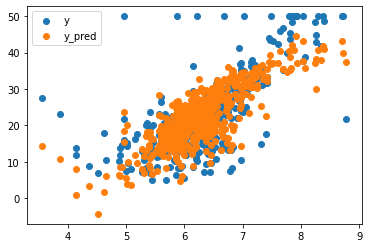

In [23]:
plt.scatter(X[:,5], y, label="y")
plt.scatter(X[:,5], y_pred, label="y_pred")
plt.legend()

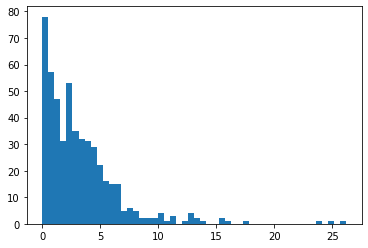

In [24]:
err_hist = np.abs(y - y_pred)
plt.hist(err_hist, bins=50)
plt.show()

## R2 = Coefficient de Détermination

Ce qui permet de calculer le score de tous les models de régression (LinearRegression, KNeighborsRegressor, SVR, MLPRegressor)

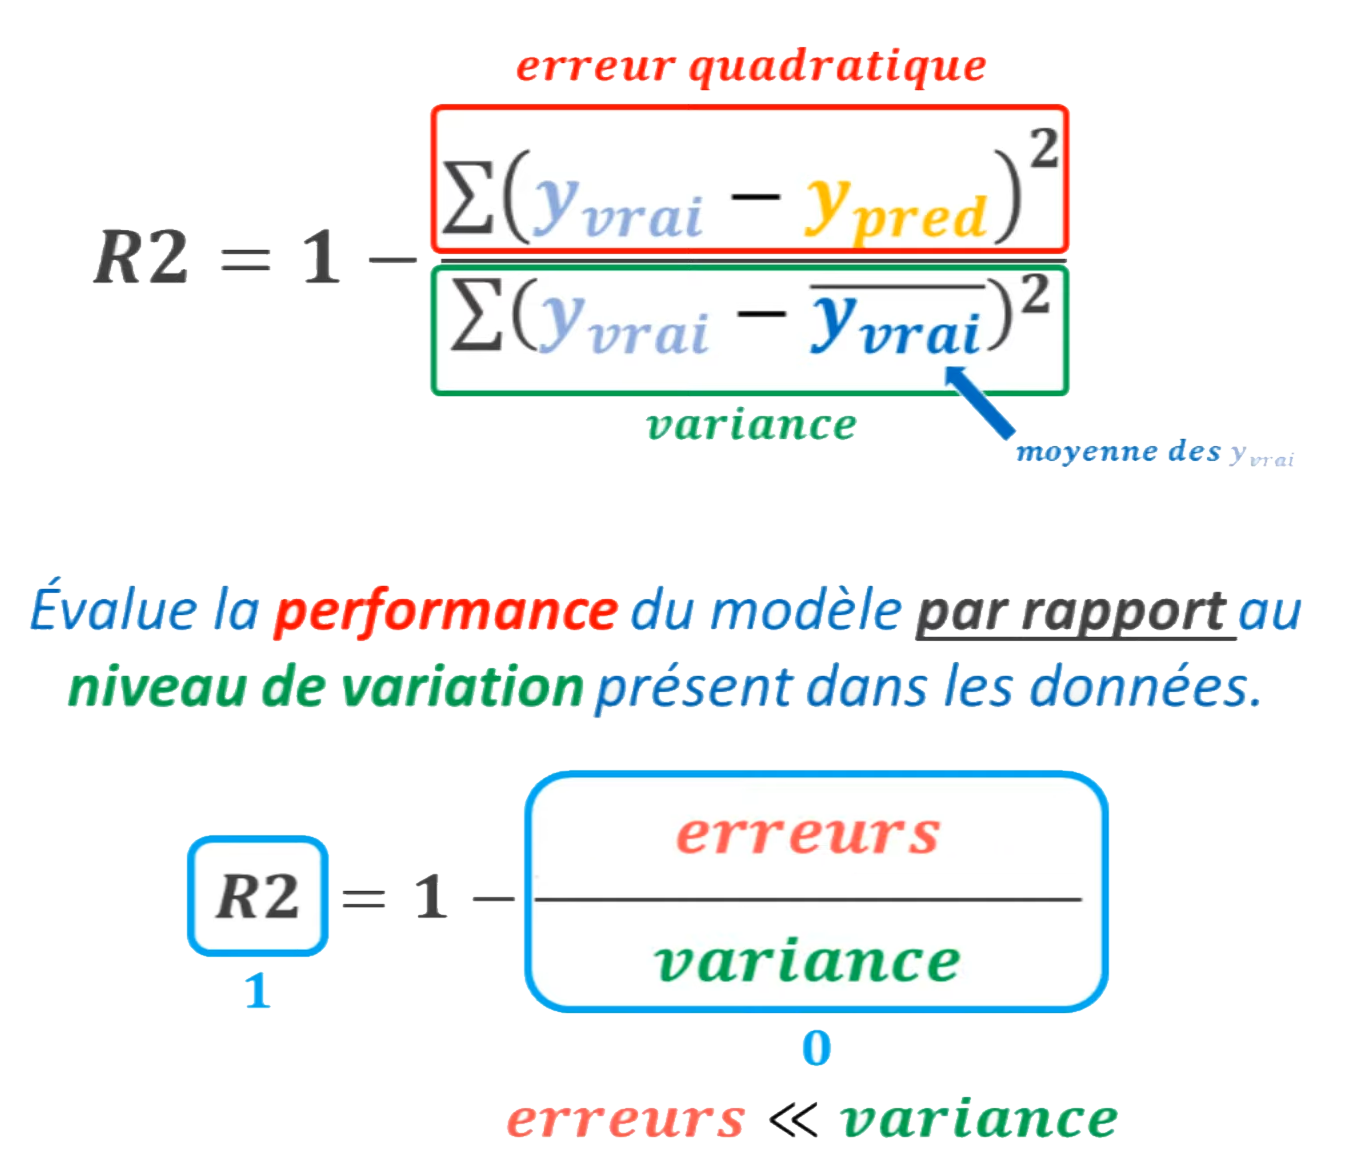

In [25]:
Image(filename = img_path + "choix-model-010-coefficien_R2.png")

In [28]:
print("Coefficient de determination R2 =", round(model.score(X, y),2))

Coefficient de determination R2 = 0.74


Notre modèle décrit 74% des variations du prix de l'immobilier

In [31]:
from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -3.32352337,  -4.27948547, -13.47752829])

In [30]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# Les limites des architectures "feedforward"

https://openclassrooms.com/fr/courses/5801891-initiez-vous-au-deep-learning/5814641-initiez-vous-aux-problematiques-liees-au-traitement-de-sequences

Dans la première partie de ce cours, nous avons découvert les réseaux de neurones dits ``feedforward``, dans lesquels l'information transite des entrées vers les sorties. Les ``perceptrons multicouches`` (PMC, ou MLP pour MultiLayer Perceptrons, en anglais) et les ``réseaux convolutionnels`` (CNN) rentrent dans cette catégorie.

Aujourd'hui, ces modèles sont la référence pour l'apprentissage machine, car ils ont de nombreux avantages :

- performances à l'état de l'art ;
- rapides en décision (mais longs en apprentissage !) ;
- supportent très bien des hautes dimensions en entrée et/ou en sortie ;
- capables d'extraire des caractéristiques automatiquement, notamment sur les images avec les CNN ;
- existence d'un algorithme efficace d'apprentissage : la rétropropagation du gradient.

## Limites liées à la taille des données

Malheureusement, les modèles feedforward ont également une contrainte importante : la taille de l'entrée et la taille de sortie doivent être identiques pour tous les exemples à traiter, aussi bien en apprentissage qu'en décision.

> Si l'on prend l'exemple d'un problème de reconnaissance d'image de chiffres manuscrits, les architectures feedforward imposent que toutes les images de chiffres soient de même taille ; par exemple 28×28 pixels. Bien évidemment, ce n'est pas du tout représentatif de la réalité, comme on peut le constater ci dessous !

Dans la pratique, dans la plupart des domaines où l'on est susceptible d'utiliser des réseaux de neurones, cette contrainte n'est pas vérifiée. Voici quelques exemples :

- *reconnaissance de signaux* tels que la parole ou l'écriture : ces signaux ne font jamais la même taille ;
- *classifier* automatiquement des avis sur des sites marchands : les avis sont plus ou moins longs ;
- *traduction* automatique : la taille des textes à traduire est variable.

Dans ce dernier exemple, les données sont de taille variable aussi bien en entrée qu'en sortie du modèle. Dans certains problèmes, la taille des données d'entrée peut être différente de la taille des données de sortie. En restant dans l'exemple de la traduction automatique :

> - "How are you?" -> "Comment vas-tu ?" (3 mots -> 3 mots).
> - "I am fine, thank you" -> "Je vais bien, merci" (5 mots -> 4 mots).

> Idéalement, nous aimerions donc avoir un modèle capable de prendre en compte des données de taille variable, aussi bien en entrée qu'en sortie. Pour tous ces problèmes, nous allons désormais parler de "signaux" d'entrée et de sortie.

### L'astuce de la fenêtre glissante

Afin de traiter les signaux de taille variable, une astuce très répandue consiste à utiliser une "fenêtre glissante" qui va se déplacer dans le sens de parcours du signal pour l'analyser. À chaque déplacement, le contenu de la fenêtre sera soumis à un classifieur statique, tel qu'un réseau de neurones feedforward.